In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats1
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.drop(columns='Unnamed: 0',axis=1,inplace=True)
data.head()

,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,earnings,age
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,39
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,38
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,53
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,28


**Feature information**

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [3]:
data.columns

Index(['workclass', 'fnlwgt', 'education', 'edu-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hrs-per-week', 'native-country', 'earnings', 'age'],
      dtype='object')

# Statistical analysis of data

In [4]:
data.shape

(32537, 15)

`32537` rows in total

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32537 non-null  object
 1   fnlwgt          32537 non-null  int64 
 2   education       32537 non-null  object
 3   edu-num         32537 non-null  int64 
 4   marital-status  32537 non-null  object
 5   occupation      32537 non-null  object
 6   relationship    32537 non-null  object
 7   race            32537 non-null  object
 8   sex             32537 non-null  object
 9   capital-gain    32537 non-null  int64 
 10  capital-loss    32537 non-null  int64 
 11  hrs-per-week    32537 non-null  int64 
 12  native-country  32537 non-null  object
 13  earnings        32537 non-null  object
 14  age             32537 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**both catagorical and numerical data**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
edu-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hrs-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0


### making catagorical and numerical dataframes

In [7]:
cat_data = data[[i for i in data.columns if data[i].dtype == 'O']]
num_data = data[[i for i in data.columns if data[i].dtype != 'O']]

In [8]:
cat_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,earnings
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [9]:
cat_data.describe(include='all').T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital-status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,32537,6,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native-country,32537,42,United-States,29153
earnings,32537,2,<=50K,24698


### Univariate analysis

<AxesSubplot:xlabel='workclass', ylabel='count'>

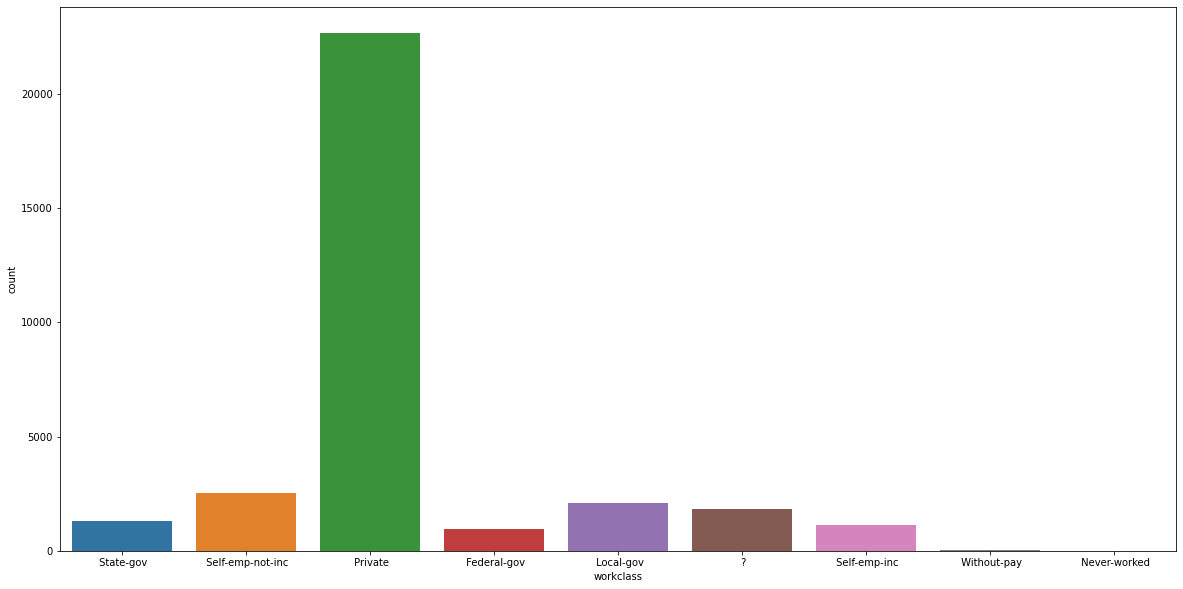

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(cat_data.workclass)

In [11]:
cat = [i for i in data.columns if data[i].dtype == 'O']
num = [i for i in data.columns if data[i].dtype != 'O']

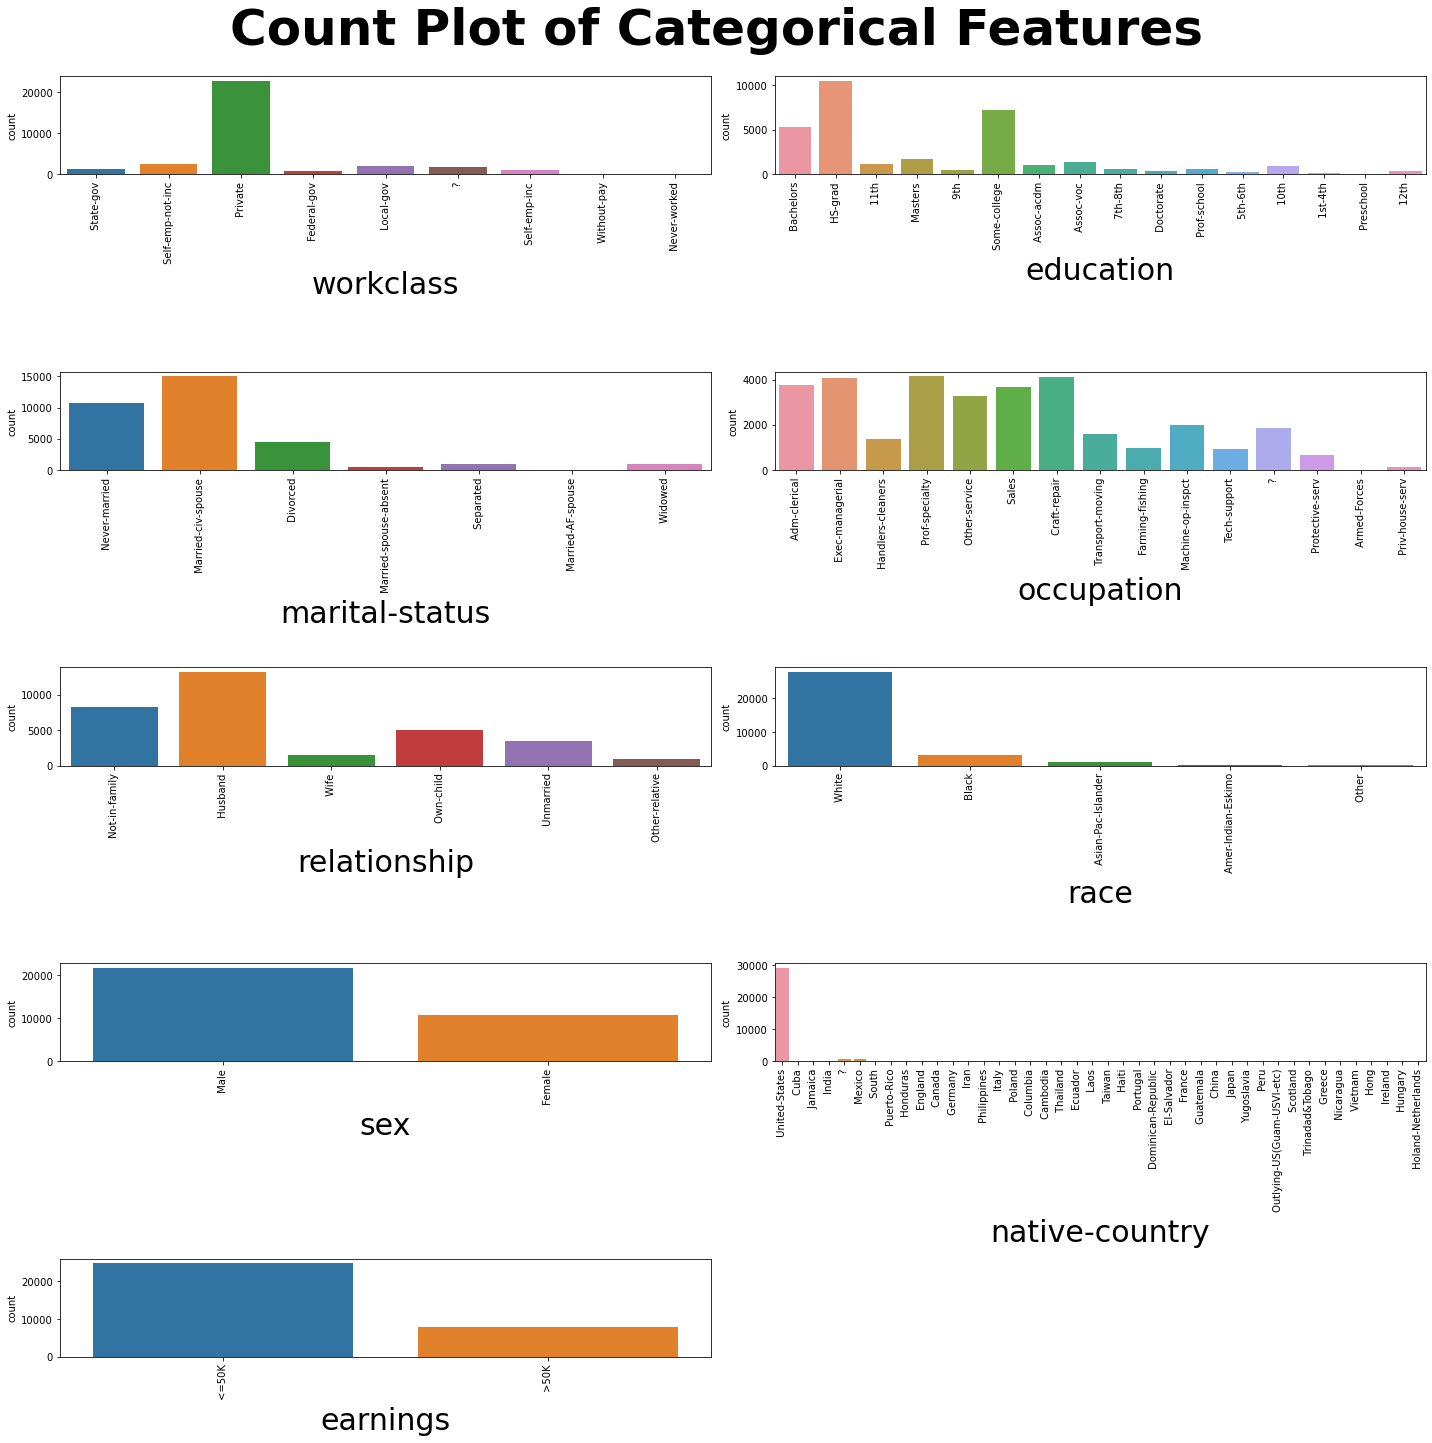

In [12]:
plt.figure(figsize=(20, 20))
plt.suptitle('Count Plot of Categorical Features', fontsize=50, fontweight='bold', alpha=1, y=1)

for i in range(0, len(cat)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=cat[i], data=data)
    plt.xlabel(cat[i],fontsize=30)
    plt.xticks(rotation=90)
    plt.tight_layout()

* more people are working in private companies
* there are more maried people than unmaried
* there are more husbands than wives
* race vise, people of white race are more in the company
* there are more males than females
* people belong to mostly USA
* most of the people earn less than 50k dollars per anum

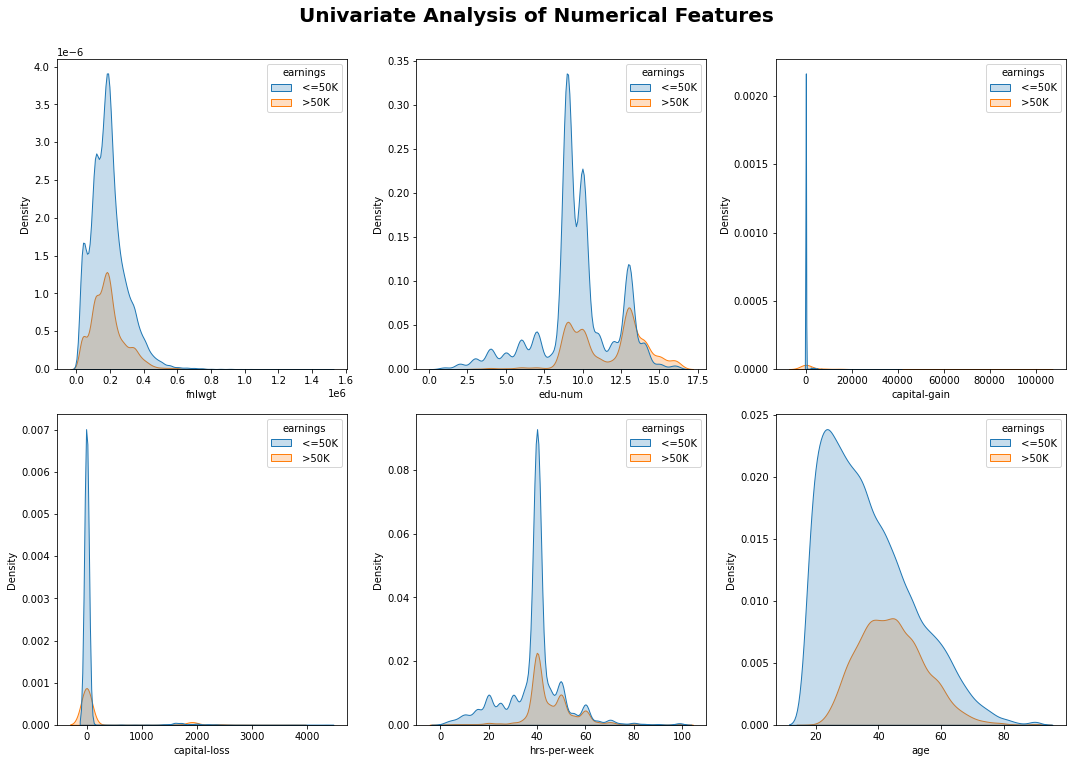

In [13]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=num[i],shade=True, color='b',data=data,hue='earnings')
    plt.xlabel(num[i])
    plt.tight_layout()

In [14]:
# sns.pairplot(data,hue='earnings',kind='kde')

<AxesSubplot:>

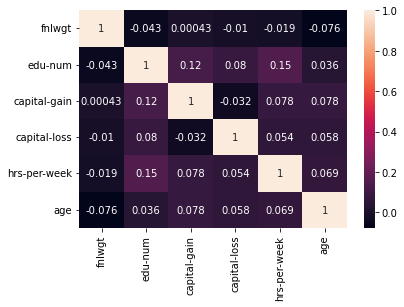

In [15]:
sns.heatmap(num_data.corr(),annot = True)

- very less correlation

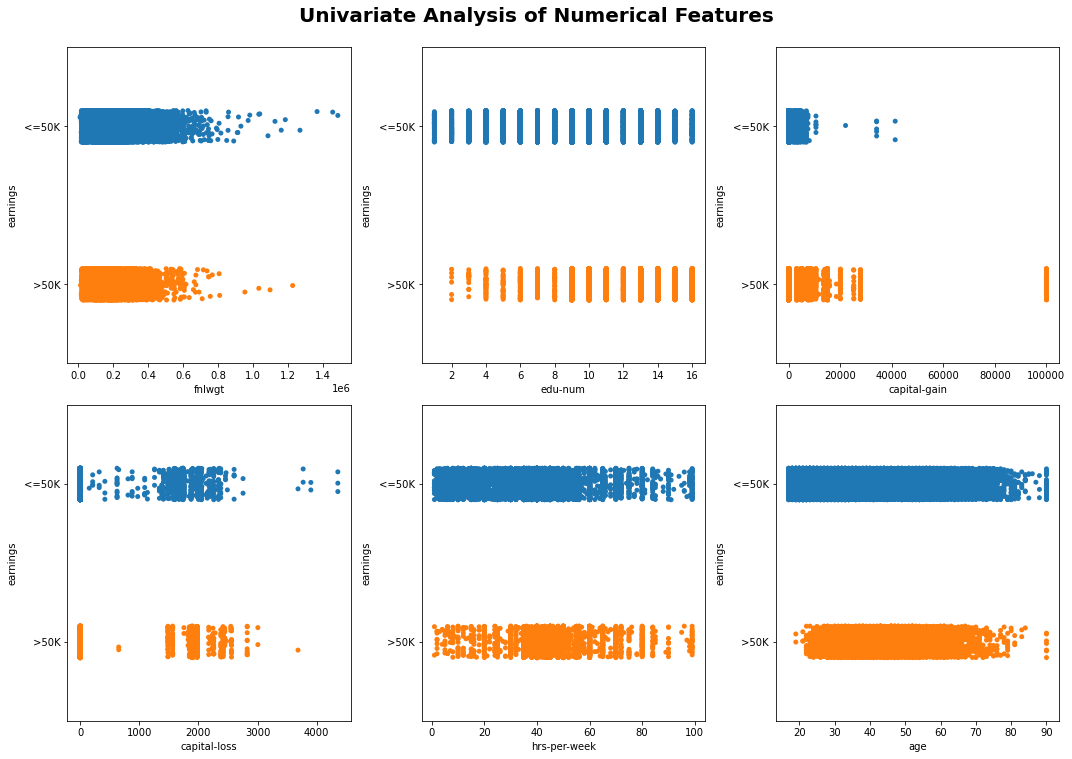

In [16]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num)):
    plt.subplot(4, 3, i+1)
    sns.stripplot(x=num[i],y='earnings',data=data)
    plt.xlabel(num[i])
    plt.tight_layout()

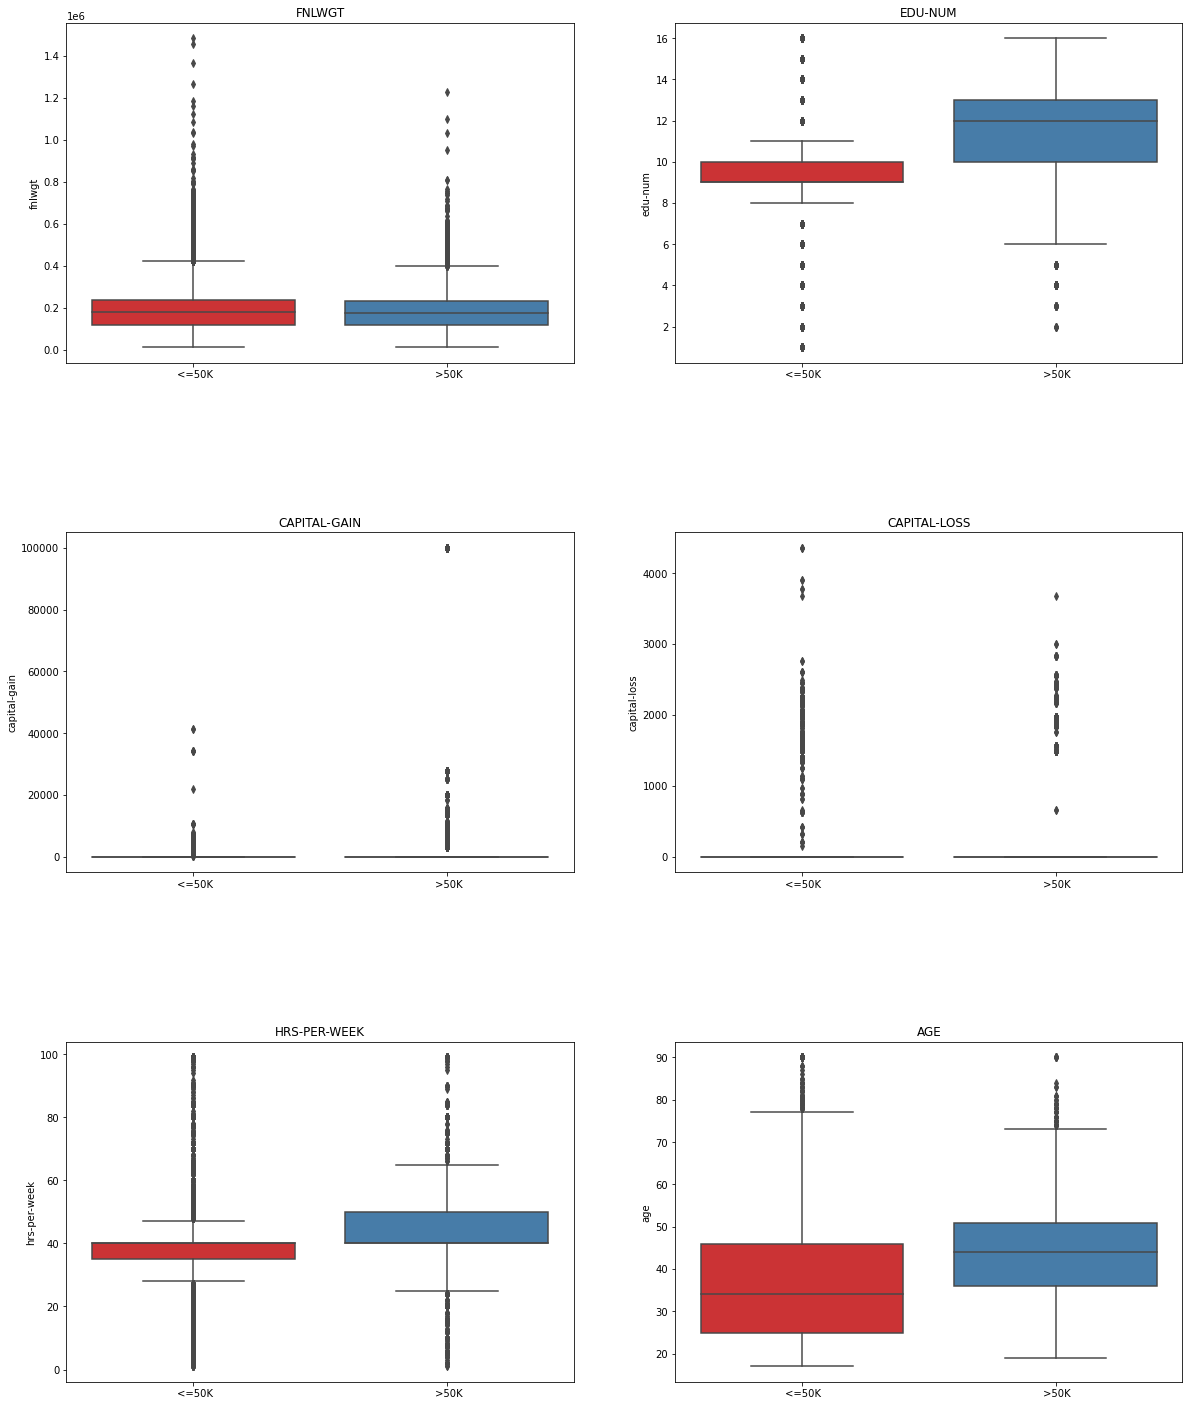

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,25))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(num_data.columns.to_list(), axs.ravel()):
    sns.boxplot(x='earnings',y=num_data[col],data=data,palette='Set1',ax=ax)

    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

In [18]:
data.skew()

fnlwgt           1.447703
edu-num         -0.309500
capital-gain    11.949403
capital-loss     4.592702
hrs-per-week     0.228759
age              0.557663
dtype: float64

In [19]:
data.kurtosis()

fnlwgt            6.222006
edu-num           0.619024
capital-gain    154.682954
capital-loss     20.358254
hrs-per-week      2.917718
age              -0.169850
dtype: float64

**Capital-gain has a lots of skewness and kurtosis which means they have a huge tail in the distribution and will cause a lot of problems in making a good model**

<AxesSubplot:xlabel='capital-gain'>

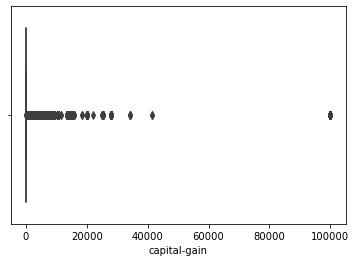

In [20]:
sns.boxplot(data['capital-gain'])

In [21]:
df_loss_withoutzero=data.loc[data["capital-loss"]!=0,:] 
df_loss_withoutzero.head()

,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,earnings,age
23,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K,43
32,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K,45
52,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K,47
93,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K,30
96,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K,48


In [22]:
df_gain_withoutzero=data.loc[data["capital-gain"]!=0,:] 
df_gain_withoutzero.head()

,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,earnings,age
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,39
8,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,31
9,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,42
59,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K,30
60,Private,59496,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,<=50K,30


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

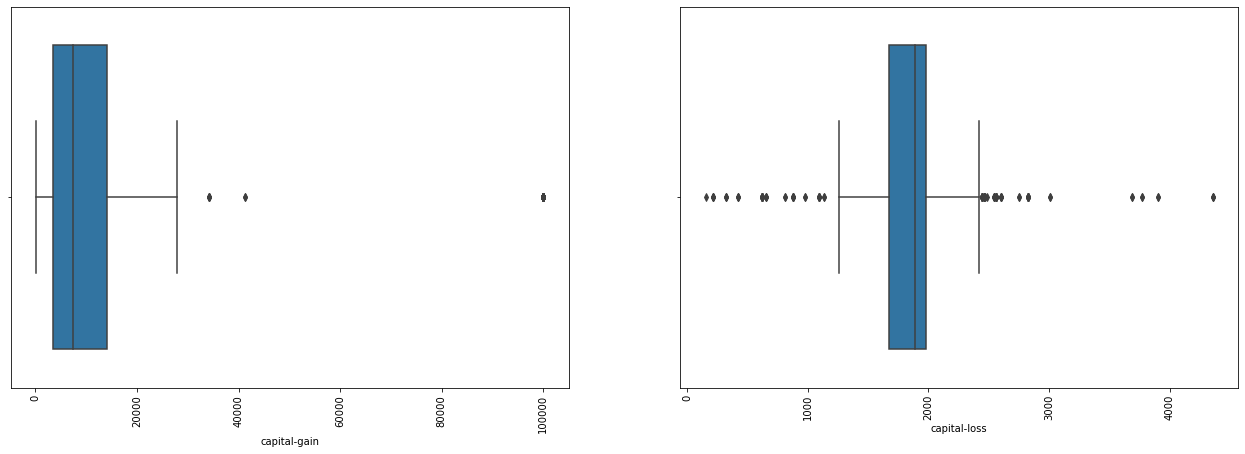

In [23]:
plt.figure(figsize=(22,7))

plt.subplot(121)
sns.boxplot(df_gain_withoutzero["capital-gain"])
plt.xticks(rotation=90) 

plt.subplot(122)
sns.boxplot(df_loss_withoutzero["capital-loss"])
plt.xticks(rotation=90)

In [24]:
lower_limits=[]
upper_limits=[]
IQR_values=[]

for i in range(len(num)):
    
    Q1=data[num[i]].quantile(0.25) 
    Q3=data[num[i]].quantile(0.75) 
    IQR=Q3-Q1 
    IQR_values.append(IQR)
    lower_limit=Q1-(1.5*IQR) 
    lower_limits.append(lower_limit)
    upper_limit=Q3+1.5*IQR 
    upper_limits.append(upper_limit)

In [25]:
IQR_table=pd.DataFrame({"numeric_columns":num,"lower_limits":lower_limits,
                        "upper_limits":upper_limits,"IQR_values":IQR_values})
IQR_table 

,numeric_columns,lower_limits,upper_limits,IQR_values
0,fnlwgt,-60922.0,415742.0,119166.0
1,edu-num,4.5,16.5,3.0
2,capital-gain,0.0,0.0,0.0
3,capital-loss,0.0,0.0,0.0
4,hrs-per-week,32.5,52.5,5.0
5,age,-2.0,78.0,20.0


In [26]:
Q1_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.25)
Q3_loss=data[data["capital-loss"]!=0]["capital-loss"].quantile(0.75)
IQR_loss=Q3_loss-Q1_loss
lower_limit_loss=Q1_loss-(1.5*IQR_loss)
upper_limit_loss=Q3_loss+(1.5*IQR_loss)

print("Capital-Loss Lower Limit :",lower_limit_loss)
print("Capital-Loss Upper Limit :",upper_limit_loss)

Capital-Loss Lower Limit : 1214.5
Capital-Loss Upper Limit : 2434.5


In [27]:
Q1_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.25)
Q3_gain=data[data["capital-gain"]!=0]["capital-gain"].quantile(0.75)
IQR_gain=Q3_gain-Q1_gain
lower_limit_gain=Q1_gain-(1.5*IQR_gain)
upper_limit_gain=Q3_gain+(1.5*IQR_gain)

print("Capital-Gain  Lower Limit :",lower_limit_gain)
print("Capital-Gain  Upper Limit:",upper_limit_gain)

Capital-Gain  Lower Limit : -12598.5
Capital-Gain  Upper Limit: 30093.5


In [28]:
df_loss_withoutzero[(df_loss_withoutzero["capital-loss"]<lower_limit_loss )|( df_loss_withoutzero["capital-loss"]>upper_limit_loss)]["capital-loss"].shape

(107,)

In [29]:
df_gain_withoutzero[(df_gain_withoutzero["capital-gain"]<lower_limit_gain )|( df_gain_withoutzero["capital-gain"]>upper_limit_gain)]["capital-gain"].shape

(166,)

In [30]:
df_gain_withoutzero["capital-gain"].mode()[0] 

15024

In [31]:
df_loss_withoutzero["capital-loss"].mode()[0]

1902

In [32]:
data[((data["capital-gain"]!=0 )& (data["capital-gain"]<lower_limit_gain )) | ((data["capital-gain"]!=0 )& (data["capital-gain"]>upper_limit_gain ))].head()

,workclass,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-week,native-country,earnings,age
106,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,17
1246,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K,54
1368,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K,52
1482,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K,53
1528,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K,52


In [33]:
outlier_gain=((data["capital-gain"]!=0 )& (data["capital-gain"]<lower_limit_gain )) | ((data["capital-gain"]!=0 )& (data["capital-gain"]>upper_limit_gain ))

In [34]:
outlier_loss=((data["capital-loss"]!=0 )& (data["capital-loss"]<lower_limit_loss)) | ((data["capital-loss"]!=0 )& (data["capital-loss"]>upper_limit_loss ))

In [35]:
data.loc[outlier_gain,"capital-gain"]=df_gain_withoutzero["capital-gain"].mode()[0]

In [36]:
data.loc[outlier_loss,"capital-loss"]=df_loss_withoutzero["capital-loss"].mode()[0]

In [37]:
print("outlier number for age: {}".format(data[(data["age"]<(lower_limits[0]))|(data["age"]>(upper_limits[0]))].shape[0]))

outlier number for age: 0
